In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point

## Static Data - Bus Stops in Eastern Queens

In [2]:
stops = pd.read_csv('../data/stops.csv')

stops.head()

,Route ID,Stop ID,Stop Name,Latitude,Longitude
0,MTA%20NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA%20NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA%20NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA%20NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA%20NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [3]:
stops.columns = ['route_id', 'stop_id', 'stop_name', 'latitude', 'longitude']
stops.head()

,route_id,stop_id,stop_name,latitude,longitude
0,MTA%20NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA%20NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA%20NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA%20NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA%20NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [4]:
# Save the list of routes separately to help read in the real-time data
routes = [' '.join(route.split('%20')) for route in stops['route_id'].unique()]
routes

['MTA NYCT_Q1',
 'MTA NYCT_Q2',
 'MTA NYCT_Q3',
 'MTA NYCT_Q4',
 'MTA NYCT_Q5',
 'MTA NYCT_Q12',
 'MTA NYCT_Q13',
 'MTA NYCT_Q20A',
 'MTA NYCT_Q20B',
 'MTA NYCT_Q27',
 'MTA NYCT_Q28',
 'MTA NYCT_Q30',
 'MTA NYCT_Q31',
 'MTA NYCT_Q36',
 'MTA NYCT_Q43',
 'MTA NYCT_Q44+',
 'MTA NYCT_Q46',
 'MTA NYCT_Q76',
 'MTA NYCT_Q77',
 'MTA NYCT_Q83',
 'MTA NYCT_Q84',
 'MTA NYCT_Q85',
 'MTA NYCT_Q88']

In [5]:
stops['route_id'] = ['_'.join(route.split('%20')) for route in stops['route_id']]
stops.head()

,route_id,stop_id,stop_name,latitude,longitude
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [6]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   route_id   2300 non-null   object 
 1   stop_id    2300 non-null   object 
 2   stop_name  2300 non-null   object 
 3   latitude   2300 non-null   float64
 4   longitude  2300 non-null   float64
dtypes: float64(2), object(3)
memory usage: 90.0+ KB


In [7]:
stops.describe(include = 'all')

,route_id,stop_id,stop_name,latitude,longitude
count,2300,2300,2300,2300.000000,2300.000000
unique,23,1653,1194,NaN,NaN
top,MTA_NYCT_Q27,MTA_500004,ARCHER AV/SUTPHIN BLVD,NaN,NaN
freq,153,7,12,NaN,NaN
mean,NaN,NaN,NaN,40.727568,-73.777085
std,NaN,NaN,NaN,0.032617,0.033510
min,NaN,NaN,NaN,40.644892,-73.878374
25%,NaN,NaN,NaN,40.704223,-73.799480
50%,NaN,NaN,NaN,40.725414,-73.777023
75%,NaN,NaN,NaN,40.753651,-73.751026


In [8]:
stops_gdf = gpd.GeoDataFrame(
    stops, geometry = gpd.points_from_xy(stops['longitude'], stops['latitude']), crs="EPSG:4326"
)

stops_gdf.head()

,route_id,stop_id,stop_name,latitude,longitude,geometry
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156,POINT (-73.79716 40.70915)
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887,POINT (-73.79089 40.71144)
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724,POINT (-73.78272 40.71287)
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850,POINT (-73.77985 40.71357)
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516,POINT (-73.77752 40.71408)


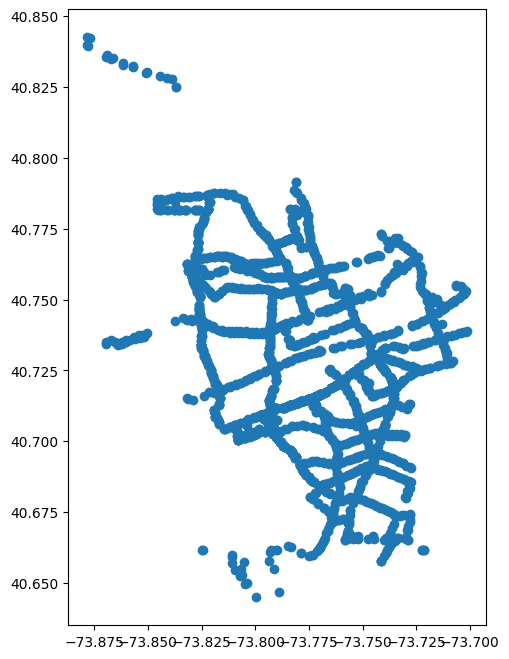

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
stops_gdf.plot(ax = ax)
plt.savefig('../images/east_queens_bus_map.png', dpi = 300)

In [10]:
# Load NYC borough boundaries
nyc_boundaries = gpd.read_file('../data/borough_boundaries.geojson')

nyc_boundaries

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,1,Manhattan,636646043.944,360037.634094,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,2,Bronx,1187174772.2,463180.578868,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,3,Brooklyn,1934142774.75,728143.833073,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3041416726.79,887896.284851,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [11]:
nyc_boundaries.describe(include = 'all')

,boro_code,boro_name,shape_area,shape_leng,geometry
count,5,5,5,5,5
unique,5,5,5,5,5
top,5,Staten Island,1623618684.31,325910.306061,MULTIPOLYGON (((-74.05050806403247 40.56642203...
freq,1,1,1,1,1


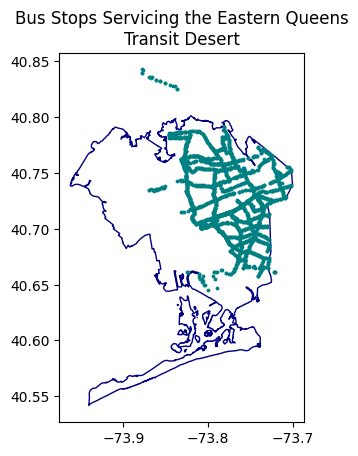

In [12]:
# Filter to Queens
queens_boundaries = nyc_boundaries[nyc_boundaries['boro_name'] == 'Queens']

# Plot stops on a map
base_layer = queens_boundaries.plot(color = 'white', edgecolor = 'navy')
stops_gdf.plot(ax = base_layer, color = 'teal', markersize = 3)
plt.title("Bus Stops Servicing the Eastern Queens\nTransit Desert")
plt.savefig('../images/east_queens_overlay.png', dpi = 300)
plt.show();

In [13]:
# Load NYC Neighborhoods
nyc_by_neighborhood = gpd.read_file('../data/nyc_by_neighborhood_2020.geojson')

nyc_by_neighborhood.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
0,35321204.8204,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.5653122,Brooklyn,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
1,28854314.555,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.0267744,Brooklyn,0,BK0102,3,047,Wllmsbrg,BK01,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4..."
2,15208960.44,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2804159,Brooklyn,0,BK0103,3,047,SWllmsbrg,BK01,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
3,52266209.4439,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.773814,Brooklyn,0,BK0104,3,047,EWllmsbrg,BK01,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
4,9982321.73877,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.506134,Brooklyn,0,BK0201,3,047,BkHts,BK02,"MULTIPOLYGON (((-73.99103 40.69985, -73.99124 ..."


In [14]:
nyc_by_neighborhood.describe(include = 'all')

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
count,262,262,262,262,262,262,262,262,262,262,262,262
unique,262,262,71,262,5,6,262,5,5,262,71,262
top,23377916.5113,Great Kills Park,QN01 Astoria-Queensbridge (CD 1 Equivalent),41763.1645788,Queens,0,SI9593,4,081,GrtKlsPk,QN01,MULTIPOLYGON (((-73.96283963628261 40.69803866...
freq,1,1,9,1,82,197,1,82,82,1,9,1


In [15]:
# Filter to Queens
queens_neighborhoods = nyc_by_neighborhood[nyc_by_neighborhood['boroname'] == 'Queens']

# Perform a spatial join to assign stops to each neighborhood
stops_by_neighborhood = gpd.sjoin(stops_gdf, queens_neighborhoods, how = 'inner', predicate = 'within')

stops_by_neighborhood.head()

,route_id,stop_id,stop_name,latitude,longitude,geometry,index_right,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156,POINT (-73.79716 40.70915),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887,POINT (-73.79089 40.71144),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724,POINT (-73.78272 40.71287),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850,POINT (-73.77985 40.71357),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516,POINT (-73.77752 40.71408),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12


In [16]:
# Group by Neighborhood and Count
stops_by_neighborhood['count'] = 1
stop_density = stops_by_neighborhood.groupby(by = 'ntaname').size().reset_index(name = "stop_count")

# Merge stop_density back into stops_by_neighborhood to plot
queens_neighborhoods = queens_neighborhoods.merge(stop_density, on = 'ntaname', how = 'left')

# Fill NaN values for neighborhoods with no stops|
queens_neighborhoods['stop_count'] = queens_neighborhoods['stop_count'].fillna(0)

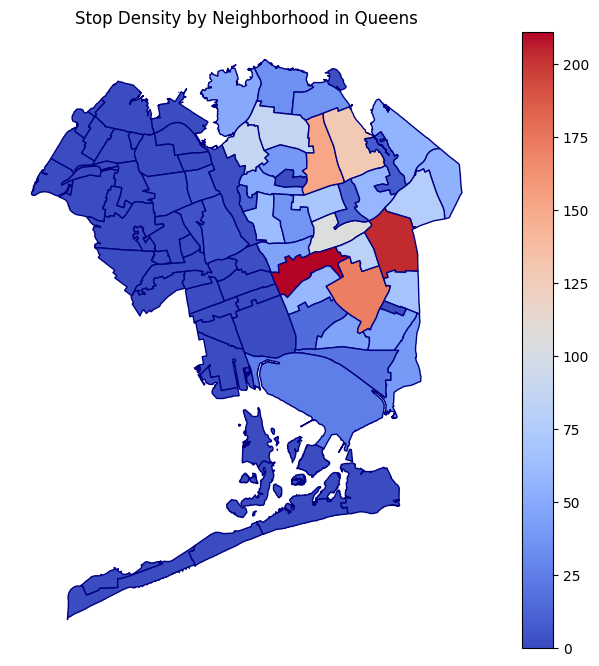

In [17]:
# Stop Density Heatmap
queens_neighborhoods.plot(
    column = 'stop_count',
    cmap = 'coolwarm',
    legend = 'True',
    figsize = (10, 8),
    edgecolor = 'navy'
)
plt.title('Stop Density by Neighborhood in Queens')
plt.axis('off')
plt.savefig('../images/eastern_queens_stop_density.png', dpi = 300)
plt.show();

In [18]:
eastern_queens_neighborhoods = queens_neighborhoods[queens_neighborhoods['stop_count'] > 0]

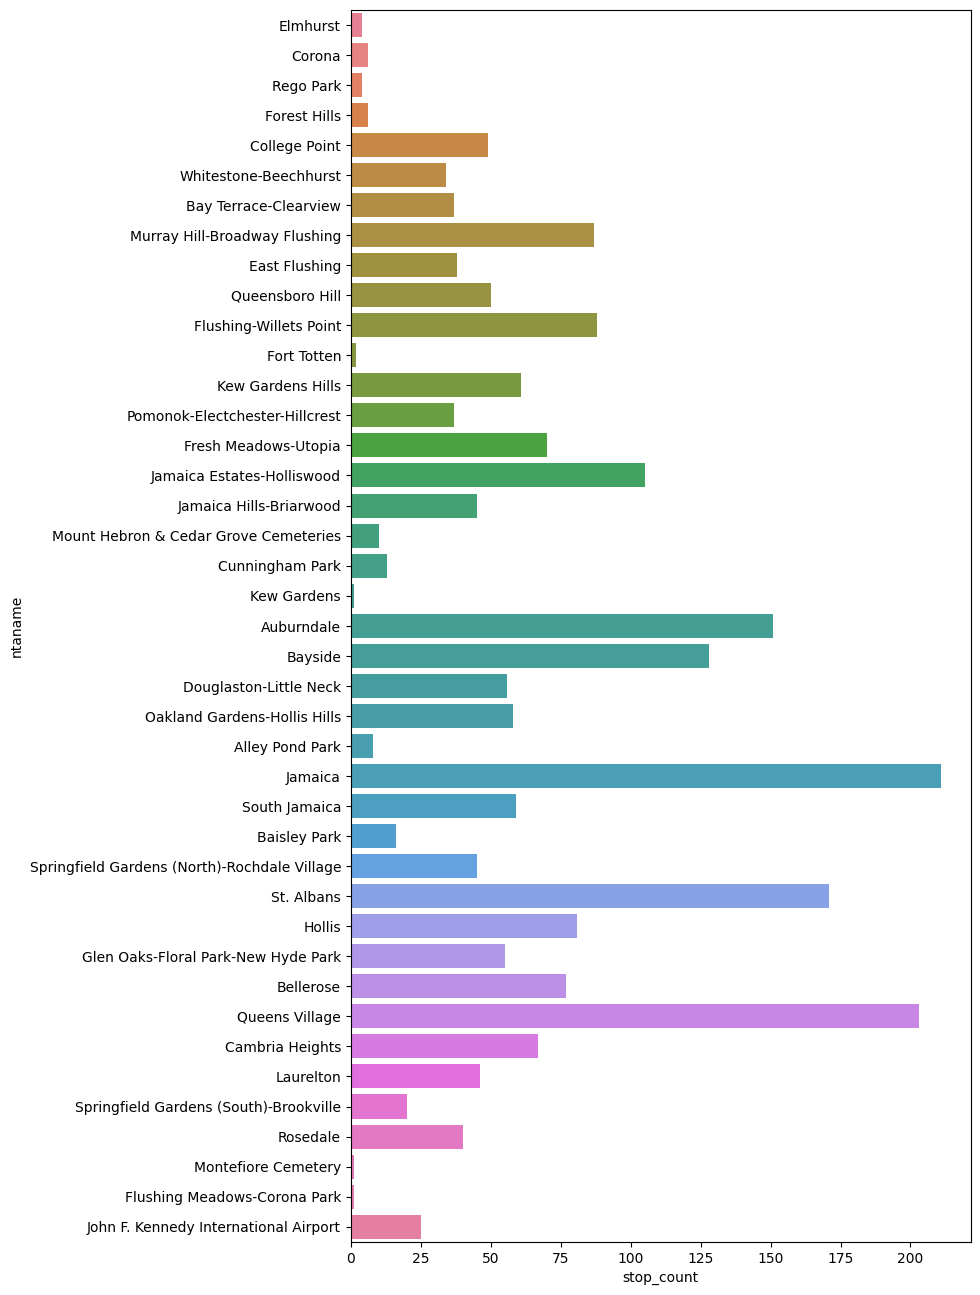

In [19]:
plt.figure(figsize = (8, 16))
sns.barplot(
    data = eastern_queens_neighborhoods,
    x = 'stop_count',
    y = 'ntaname',
    hue = 'ntaname'
);

## Real-Time Data - Buses along 23 Routes

In [20]:
# Load in the data for each route
data_dir = '../data/'

# Initialize a dictionary to hold the real-time DataFrames
real_time_dfs = {}

# Loop through all files in the directory
for file in os.listdir(data_dir):
    if file.startswith('realtime_data_') and file.endswith('.csv'):
        route_id = file.split('_')[-1].replace('.csv', '')
        df = pd.read_csv(os.path.join(data_dir, file))
        real_time_dfs[route_id] = df

for route in real_time_dfs.keys():
    display(real_time_dfs[route].head())

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q1,MTA NYCT_8517,40.707932,-73.795738,2025-01-11T07:24:03.194204
1,MTA NYCT_Q1,MTA NYCT_8498,40.718168,-73.735324,2025-01-11T07:24:03.194204
2,MTA NYCT_Q1,MTA NYCT_8304,40.712078,-73.786105,2025-01-11T07:24:03.194204
3,MTA NYCT_Q1,MTA NYCT_8304,40.717871,-73.735625,2025-01-11T07:54:01.281658
4,MTA NYCT_Q1,MTA NYCT_8517,40.729951,-73.742691,2025-01-11T07:54:01.281658


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q12,MTA NYCT_4726,40.761016,-73.808023,2025-01-11T07:24:05.056023
1,MTA NYCT_Q12,MTA NYCT_4735,40.760021,-73.823988,2025-01-11T07:24:05.056023
2,MTA NYCT_Q12,MTA NYCT_4731,40.760420,-73.814870,2025-01-11T07:24:05.056023
3,MTA NYCT_Q12,MTA NYCT_6037,40.759232,-73.773562,2025-01-11T07:24:05.056023
4,MTA NYCT_Q12,MTA NYCT_6115,40.765307,-73.744558,2025-01-11T07:24:05.056023


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q13,MTA NYCT_8958,40.760751,-73.828201,2025-01-11T07:24:05.276887
1,MTA NYCT_Q13,MTA NYCT_4677,40.779874,-73.775382,2025-01-11T07:24:05.276887
2,MTA NYCT_Q13,MTA NYCT_8942,40.765336,-73.817656,2025-01-11T07:24:05.276887
3,MTA NYCT_Q13,MTA NYCT_7411,40.757722,-73.783131,2025-01-11T07:24:05.276887
4,MTA NYCT_Q13,MTA NYCT_7402,40.757668,-73.779501,2025-01-11T07:24:05.276887


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q2,MTA NYCT_8844,40.707815,-73.795290,2025-01-11T07:24:03.568879
1,MTA NYCT_Q2,MTA NYCT_8530,40.709362,-73.746246,2025-01-11T07:24:03.568879
2,MTA NYCT_Q2,MTA NYCT_8035,40.706231,-73.756370,2025-01-11T07:24:03.568879
3,MTA NYCT_Q2,MTA NYCT_8650,40.713262,-73.735749,2025-01-11T07:54:01.552658
4,MTA NYCT_Q2,MTA NYCT_8035,40.714831,-73.774710,2025-01-11T07:54:01.552658


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q20A,MTA NYCT_7399,40.784214,-73.845532,2025-01-11T07:24:05.806687
1,MTA NYCT_Q20A,MTA NYCT_7386,40.708006,-73.817737,2025-01-11T07:24:05.806687
2,MTA NYCT_Q20A,MTA NYCT_8950,40.781682,-73.826114,2025-01-11T07:24:05.806687
3,MTA NYCT_Q20A,MTA NYCT_8947,40.731873,-73.824360,2025-01-11T07:24:05.806687
4,MTA NYCT_Q20A,MTA NYCT_4212,40.721053,-73.818926,2025-01-11T07:24:05.806687


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q20B,MTA NYCT_4660,40.785067,-73.841502,2025-01-13T06:31:51.080707
1,MTA NYCT_Q20B,MTA NYCT_7387,40.700644,-73.807366,2025-01-13T06:31:51.080707
2,MTA NYCT_Q20B,MTA NYCT_4363,40.731165,-73.824115,2025-01-13T06:31:51.080707
3,MTA NYCT_Q20B,MTA NYCT_7412,40.785252,-73.840788,2025-01-13T06:31:51.080707
4,MTA NYCT_Q20B,MTA NYCT_7422,40.763679,-73.829613,2025-01-13T06:31:51.080707


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q27,MTA NYCT_8524,40.742515,-73.753552,2025-01-11T07:24:06.456874
1,MTA NYCT_Q27,MTA NYCT_8311,40.760577,-73.831428,2025-01-11T07:24:06.456874
2,MTA NYCT_Q27,MTA NYCT_8532,40.754095,-73.813713,2025-01-11T07:24:06.456874
3,MTA NYCT_Q27,MTA NYCT_8019,40.754205,-73.810392,2025-01-11T07:24:06.456874
4,MTA NYCT_Q27,MTA NYCT_8303,40.724515,-73.739062,2025-01-11T07:24:06.456874


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q28,MTA NYCT_8774,40.771533,-73.783125,2025-01-11T07:24:06.686463
1,MTA NYCT_Q28,MTA NYCT_4700,40.776914,-73.782914,2025-01-11T07:24:06.686463
2,MTA NYCT_Q28,MTA NYCT_8960,40.763636,-73.790387,2025-01-11T07:24:06.686463
3,MTA NYCT_Q28,MTA NYCT_8961,40.762755,-73.797416,2025-01-11T07:24:06.686463
4,MTA NYCT_Q28,MTA NYCT_7371,40.760542,-73.829143,2025-01-11T07:24:06.686463


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q3,MTA NYCT_7767,40.649681,-73.803804,2025-01-11T07:24:03.927061
1,MTA NYCT_Q3,MTA NYCT_8339,40.668247,-73.766372,2025-01-11T07:24:03.927061
2,MTA NYCT_Q3,MTA NYCT_8094,40.713143,-73.773261,2025-01-11T07:24:03.927061
3,MTA NYCT_Q3,MTA NYCT_7777,40.659207,-73.774294,2025-01-11T07:24:03.927061
4,MTA NYCT_Q3,MTA NYCT_8715,40.697702,-73.762157,2025-01-11T07:24:03.927061


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q30,MTA NYCT_8065,40.764405,-73.725696,2025-01-11T07:24:06.874289
1,MTA NYCT_Q30,MTA NYCT_8853,40.732533,-73.793322,2025-01-11T07:24:06.874289
2,MTA NYCT_Q30,MTA NYCT_7727,40.704087,-73.798435,2025-01-11T07:24:06.874289
3,MTA NYCT_Q30,MTA NYCT_8067,40.702132,-73.804450,2025-01-11T07:24:06.874289
4,MTA NYCT_Q30,MTA NYCT_8067,40.742950,-73.775952,2025-01-11T07:54:03.668697


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q31,MTA NYCT_8951,40.703411,-73.795627,2025-01-11T08:54:13.277200
1,MTA NYCT_Q31,MTA NYCT_7404,40.753193,-73.781316,2025-01-11T08:54:13.277200
2,MTA NYCT_Q31,MTA NYCT_8951,40.703411,-73.795627,2025-01-11T08:54:20.890085
3,MTA NYCT_Q31,MTA NYCT_7404,40.753486,-73.779566,2025-01-11T08:54:20.890085
4,MTA NYCT_Q31,MTA NYCT_8951,40.754907,-73.770421,2025-01-11T09:24:17.807596


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q36,MTA NYCT_8409,40.728192,-73.707809,2025-01-11T07:24:07.186570
1,MTA NYCT_Q36,MTA NYCT_8821,40.711429,-73.791056,2025-01-11T07:24:07.186570
2,MTA NYCT_Q36,MTA NYCT_8329,40.722988,-73.728431,2025-01-11T07:24:07.186570
3,MTA NYCT_Q36,MTA NYCT_8330,40.720834,-73.759841,2025-01-11T07:24:07.186570
4,MTA NYCT_Q36,MTA NYCT_8425,40.717668,-73.738183,2025-01-11T07:54:03.949679


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q4,MTA NYCT_7769,40.690360,-73.727453,2025-01-11T07:24:04.231821
1,MTA NYCT_Q4,MTA NYCT_8847,40.702158,-73.801074,2025-01-11T07:24:04.231821
2,MTA NYCT_Q4,MTA NYCT_7726,40.704826,-73.791648,2025-01-11T07:24:04.231821
3,MTA NYCT_Q4,MTA NYCT_8091,40.695186,-73.749591,2025-01-11T07:24:04.231821
4,MTA NYCT_Q4,MTA NYCT_8847,40.690867,-73.727817,2025-01-11T07:54:02.135059


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q43,MTA NYCT_8521,40.738677,-73.702078,2025-01-11T07:24:07.386217
1,MTA NYCT_Q43,MTA NYCT_8030,40.732662,-73.730390,2025-01-11T07:24:07.386217
2,MTA NYCT_Q43,MTA NYCT_8308,40.735719,-73.715803,2025-01-11T07:24:07.386217
3,MTA NYCT_Q43,MTA NYCT_8725,40.712005,-73.788560,2025-01-11T07:24:07.386217
4,MTA NYCT_Q43,MTA NYCT_8827,40.735244,-73.717993,2025-01-11T07:24:07.386217


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q44+,MTA NYCT_5988,40.709919,-73.819004,2025-01-11T07:24:07.744211
1,MTA NYCT_Q44+,MTA NYCT_6028,40.758057,-73.829401,2025-01-11T07:24:07.744211
2,MTA NYCT_Q44+,MTA NYCT_5995,40.842345,-73.877090,2025-01-11T07:24:07.744211
3,MTA NYCT_Q44+,MTA NYCT_6018,40.824967,-73.836151,2025-01-11T07:24:07.744211
4,MTA NYCT_Q44+,MTA NYCT_5992,40.838837,-73.877922,2025-01-11T07:24:07.744211


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q46,MTA NYCT_8079,40.735845,-73.746450,2025-01-11T07:24:07.975909
1,MTA NYCT_Q46,MTA NYCT_8648,40.727645,-73.785798,2025-01-11T07:24:07.975909
2,MTA NYCT_Q46,MTA NYCT_8816,40.735685,-73.746746,2025-01-11T07:24:07.975909
3,MTA NYCT_Q46,MTA NYCT_8811,40.754826,-73.706744,2025-01-11T07:24:07.975909
4,MTA NYCT_Q46,MTA NYCT_8799,40.720160,-73.808396,2025-01-11T07:24:07.975909


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q5,MTA NYCT_8069,40.661377,-73.721418,2025-01-11T07:24:04.664783
1,MTA NYCT_Q5,MTA NYCT_8702,40.661645,-73.722434,2025-01-11T07:24:04.664783
2,MTA NYCT_Q5,MTA NYCT_8445,40.702345,-73.800383,2025-01-11T07:24:04.664783
3,MTA NYCT_Q5,MTA NYCT_7835,40.688218,-73.776560,2025-01-11T07:24:04.664783
4,MTA NYCT_Q5,MTA NYCT_8825,40.675510,-73.738824,2025-01-11T07:24:04.664783


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q76,MTA NYCT_8957,40.771760,-73.794443,2025-01-11T07:24:08.306827
1,MTA NYCT_Q76,MTA NYCT_7391,40.716730,-73.768902,2025-01-11T07:24:08.306827
2,MTA NYCT_Q76,MTA NYCT_7374,40.731554,-73.769877,2025-01-11T07:24:08.306827
3,MTA NYCT_Q76,MTA NYCT_8773,40.770299,-73.793024,2025-01-11T07:24:08.306827
4,MTA NYCT_Q76,MTA NYCT_7431,40.707919,-73.795772,2025-01-11T07:24:08.306827


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q77,MTA NYCT_8098,40.711870,-73.789742,2025-01-11T07:24:08.495575
1,MTA NYCT_Q77,MTA NYCT_8061,40.710495,-73.752531,2025-01-11T07:24:08.495575
2,MTA NYCT_Q77,MTA NYCT_8338,40.692951,-73.744917,2025-01-11T07:24:08.495575
3,MTA NYCT_Q77,MTA NYCT_8098,40.711824,-73.753066,2025-01-11T07:54:04.802187
4,MTA NYCT_Q77,MTA NYCT_8052,40.710767,-73.752640,2025-01-11T07:54:04.802187


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q83,MTA NYCT_8503,40.707106,-73.804449,2025-01-11T07:24:08.736300
1,MTA NYCT_Q83,MTA NYCT_8522,40.699146,-73.757972,2025-01-11T07:24:08.736300
2,MTA NYCT_Q83,MTA NYCT_8412,40.701874,-73.730436,2025-01-11T07:24:08.736300
3,MTA NYCT_Q83,MTA NYCT_8642,40.703231,-73.789089,2025-01-11T07:24:08.736300
4,MTA NYCT_Q83,MTA NYCT_8417,40.702532,-73.736247,2025-01-11T07:24:08.736300


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q84,MTA NYCT_8822,40.702316,-73.790588,2025-01-11T07:24:08.906378
1,MTA NYCT_Q84,MTA NYCT_8048,40.691823,-73.779419,2025-01-11T07:24:08.906378
2,MTA NYCT_Q84,MTA NYCT_8767,40.689066,-73.753969,2025-01-11T07:24:08.906378
3,MTA NYCT_Q84,MTA NYCT_8349,40.684719,-73.727371,2025-01-11T07:24:08.906378
4,MTA NYCT_Q84,MTA NYCT_8822,40.689583,-73.740635,2025-01-11T07:54:05.130523


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q85,MTA NYCT_8102,40.702603,-73.799209,2025-01-11T07:24:09.142065
1,MTA NYCT_Q85,MTA NYCT_8769,40.691546,-73.779057,2025-01-11T07:24:09.142065
2,MTA NYCT_Q85,MTA NYCT_8883,40.674964,-73.765817,2025-01-11T07:24:09.142065
3,MTA NYCT_Q85,MTA NYCT_8780,40.677749,-73.770319,2025-01-11T07:24:09.142065
4,MTA NYCT_Q85,MTA NYCT_8831,40.663624,-73.736306,2025-01-11T07:24:09.142065


,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
0,MTA NYCT_Q88,MTA NYCT_8403,40.735566,-73.858204,2025-01-11T07:24:09.329362
1,MTA NYCT_Q88,MTA NYCT_8320,40.735215,-73.869608,2025-01-11T07:24:09.329362
2,MTA NYCT_Q88,MTA NYCT_8302,40.740059,-73.786249,2025-01-11T07:24:09.329362
3,MTA NYCT_Q88,MTA NYCT_8419,40.729692,-73.744567,2025-01-11T07:24:09.329362
4,MTA NYCT_Q88,MTA NYCT_8764,40.733588,-73.781596,2025-01-11T07:24:09.329362


In [21]:
# Inspect datatypes and missing values and run summary statistics
for route_id, df in real_time_dfs.items():
    display(df.info())
    display(df.describe(include = 'all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    681 non-null    object 
 1   Vehicle ID  681 non-null    object 
 2   Latitude    681 non-null    float64
 3   Longitude   681 non-null    float64
 4   Timestamp   681 non-null    object 
dtypes: float64(2), object(3)
memory usage: 26.7+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,681,681,681.000000,681.000000,681
unique,1,80,NaN,NaN,153
top,MTA NYCT_Q1,MTA NYCT_8511,NaN,NaN,2025-01-13T19:04:14.533828
freq,681,25,NaN,NaN,9
mean,NaN,NaN,40.718283,-73.764233,NaN
std,NaN,NaN,0.007372,0.024080,NaN
min,NaN,NaN,40.707739,-73.797305,NaN
25%,NaN,NaN,40.711382,-73.791184,NaN
50%,NaN,NaN,40.717860,-73.758126,NaN
75%,NaN,NaN,40.725415,-73.743289,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1335 non-null   object 
 1   Vehicle ID  1335 non-null   object 
 2   Latitude    1335 non-null   float64
 3   Longitude   1335 non-null   float64
 4   Timestamp   1335 non-null   object 
dtypes: float64(2), object(3)
memory usage: 52.3+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1335,1335,1335.000000,1335.000000,1335
unique,1,36,NaN,NaN,150
top,MTA NYCT_Q12,MTA NYCT_4740,NaN,NaN,2025-01-14T17:19:22.613076
freq,1335,131,NaN,NaN,12
mean,NaN,NaN,40.761597,-73.788240,NaN
std,NaN,NaN,0.004029,0.032952,NaN
min,NaN,NaN,40.757562,-73.832305,NaN
25%,NaN,NaN,40.759104,-73.820785,NaN
50%,NaN,NaN,40.760301,-73.792625,NaN
75%,NaN,NaN,40.761544,-73.761139,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1189 non-null   object 
 1   Vehicle ID  1189 non-null   object 
 2   Latitude    1189 non-null   float64
 3   Longitude   1189 non-null   float64
 4   Timestamp   1189 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.6+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1189,1189,1189.000000,1189.000000,1189
unique,1,70,NaN,NaN,156
top,MTA NYCT_Q13,MTA NYCT_7390,NaN,NaN,2025-01-14T08:17:43.124694
freq,1189,52,NaN,NaN,12
mean,NaN,NaN,40.767432,-73.796736,NaN
std,NaN,NaN,0.010592,0.021859,NaN
min,NaN,NaN,40.757562,-73.829626,NaN
25%,NaN,NaN,40.760638,-73.819909,NaN
50%,NaN,NaN,40.763546,-73.788657,NaN
75%,NaN,NaN,40.768100,-73.776391,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    827 non-null    object 
 1   Vehicle ID  827 non-null    object 
 2   Latitude    827 non-null    float64
 3   Longitude   827 non-null    float64
 4   Timestamp   827 non-null    object 
dtypes: float64(2), object(3)
memory usage: 32.4+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,827,827,827.000000,827.000000,827
unique,1,95,NaN,NaN,155
top,MTA NYCT_Q2,MTA NYCT_8641,NaN,NaN,2025-01-14T15:18:57.224849
freq,827,32,NaN,NaN,9
mean,NaN,NaN,40.710400,-73.765241,NaN
std,NaN,NaN,0.002430,0.024232,NaN
min,NaN,NaN,40.706162,-73.797297,NaN
25%,NaN,NaN,40.707927,-73.790347,NaN
50%,NaN,NaN,40.710588,-73.768759,NaN
75%,NaN,NaN,40.712615,-73.740893,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1654 non-null   object 
 1   Vehicle ID  1654 non-null   object 
 2   Latitude    1654 non-null   float64
 3   Longitude   1654 non-null   float64
 4   Timestamp   1654 non-null   object 
dtypes: float64(2), object(3)
memory usage: 64.7+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1654,1654,1654.000000,1654.000000,1654
unique,1,94,NaN,NaN,154
top,MTA NYCT_Q20A,MTA NYCT_4212,NaN,NaN,2025-01-11T13:25:09.600044
freq,1654,81,NaN,NaN,18
mean,NaN,NaN,40.742390,-73.822039,NaN
std,NaN,NaN,0.030177,0.013990,NaN
min,NaN,NaN,40.700600,-73.845937,NaN
25%,NaN,NaN,40.707642,-73.829153,NaN
50%,NaN,NaN,40.747475,-73.825351,NaN
75%,NaN,NaN,40.769320,-73.816392,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    537 non-null    object 
 1   Vehicle ID  537 non-null    object 
 2   Latitude    537 non-null    float64
 3   Longitude   537 non-null    float64
 4   Timestamp   537 non-null    object 
dtypes: float64(2), object(3)
memory usage: 21.1+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,537,537,537.000000,537.000000,537
unique,1,52,NaN,NaN,62
top,MTA NYCT_Q20B,MTA NYCT_4660,NaN,NaN,2025-01-13T15:03:26.314443
freq,537,24,NaN,NaN,14
mean,NaN,NaN,40.743457,-73.822034,NaN
std,NaN,NaN,0.031277,0.014112,NaN
min,NaN,NaN,40.700620,-73.845802,NaN
25%,NaN,NaN,40.706343,-73.829380,NaN
50%,NaN,NaN,40.746278,-73.825118,NaN
75%,NaN,NaN,40.772874,-73.816352,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    3445 non-null   object 
 1   Vehicle ID  3445 non-null   object 
 2   Latitude    3445 non-null   float64
 3   Longitude   3445 non-null   float64
 4   Timestamp   3445 non-null   object 
dtypes: float64(2), object(3)
memory usage: 134.7+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,3445,3445,3445.000000,3445.000000,3445
unique,1,191,NaN,NaN,161
top,MTA NYCT_Q27,MTA NYCT_8765,NaN,NaN,2025-01-13T08:32:17.390137
freq,3445,71,NaN,NaN,47
mean,NaN,NaN,40.740275,-73.778686,NaN
std,NaN,NaN,0.021359,0.035587,NaN
min,NaN,NaN,40.688048,-73.832601,NaN
25%,NaN,NaN,40.726730,-73.818825,NaN
50%,NaN,NaN,40.752217,-73.767471,NaN
75%,NaN,NaN,40.754209,-73.744299,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1214 non-null   object 
 1   Vehicle ID  1214 non-null   object 
 2   Latitude    1214 non-null   float64
 3   Longitude   1214 non-null   float64
 4   Timestamp   1214 non-null   object 
dtypes: float64(2), object(3)
memory usage: 47.5+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1214,1214,1214.000000,1214.000000,1214
unique,1,90,NaN,NaN,154
top,MTA NYCT_Q28,MTA NYCT_8852,NaN,NaN,2025-01-13T07:32:04.081254
freq,1214,46,NaN,NaN,19
mean,NaN,NaN,40.767785,-73.803136,NaN
std,NaN,NaN,0.007202,0.019389,NaN
min,NaN,NaN,40.760522,-73.829615,NaN
25%,NaN,NaN,40.762777,-73.825599,NaN
50%,NaN,NaN,40.764591,-73.798989,NaN
75%,NaN,NaN,40.771682,-73.783825,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1489 non-null   object 
 1   Vehicle ID  1489 non-null   object 
 2   Latitude    1489 non-null   float64
 3   Longitude   1489 non-null   float64
 4   Timestamp   1489 non-null   object 
dtypes: float64(2), object(3)
memory usage: 58.3+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1489,1489,1489.000000,1489.000000,1489
unique,1,127,NaN,NaN,154
top,MTA NYCT_Q3,MTA NYCT_8453,NaN,NaN,2025-01-14T15:18:57.441760
freq,1489,38,NaN,NaN,19
mean,NaN,NaN,40.682184,-73.782440,NaN
std,NaN,NaN,0.022917,0.019649,NaN
min,NaN,NaN,40.644088,-73.825385,NaN
25%,NaN,NaN,40.661492,-73.795642,NaN
50%,NaN,NaN,40.680363,-73.774528,NaN
75%,NaN,NaN,40.707671,-73.765530,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1370 non-null   object 
 1   Vehicle ID  1370 non-null   object 
 2   Latitude    1370 non-null   float64
 3   Longitude   1370 non-null   float64
 4   Timestamp   1370 non-null   object 
dtypes: float64(2), object(3)
memory usage: 53.6+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1370,1370,1370.000000,1370.000000,1370
unique,1,137,NaN,NaN,154
top,MTA NYCT_Q30,MTA NYCT_7776,NaN,NaN,2025-01-13T15:33:34.597733
freq,1370,37,NaN,NaN,24
mean,NaN,NaN,40.729280,-73.779527,NaN
std,NaN,NaN,0.020934,0.023820,NaN
min,NaN,NaN,40.700251,-73.809027,NaN
25%,NaN,NaN,40.707746,-73.793256,NaN
50%,NaN,NaN,40.730224,-73.791396,NaN
75%,NaN,NaN,40.747886,-73.760557,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    836 non-null    object 
 1   Vehicle ID  836 non-null    object 
 2   Latitude    836 non-null    float64
 3   Longitude   836 non-null    float64
 4   Timestamp   836 non-null    object 
dtypes: float64(2), object(3)
memory usage: 32.8+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,836,836,836.000000,836.000000,836
unique,1,125,NaN,NaN,133
top,MTA NYCT_Q31,MTA NYCT_4669,NaN,NaN,2025-01-14T15:18:59.765581
freq,836,25,NaN,NaN,21
mean,NaN,NaN,40.738163,-73.788382,NaN
std,NaN,NaN,0.025915,0.010837,NaN
min,NaN,NaN,40.700291,-73.808994,NaN
25%,NaN,NaN,40.709404,-73.793321,NaN
50%,NaN,NaN,40.742092,-73.791946,NaN
75%,NaN,NaN,40.762020,-73.779864,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    939 non-null    object 
 1   Vehicle ID  939 non-null    object 
 2   Latitude    939 non-null    float64
 3   Longitude   939 non-null    float64
 4   Timestamp   939 non-null    object 
dtypes: float64(2), object(3)
memory usage: 36.8+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,939,939,939.000000,939.000000,939
unique,1,74,NaN,NaN,153
top,MTA NYCT_Q36,MTA NYCT_8022,NaN,NaN,2025-01-14T07:17:31.230081
freq,939,39,NaN,NaN,13
mean,NaN,NaN,40.722538,-73.752105,NaN
std,NaN,NaN,0.014881,0.028500,NaN
min,NaN,NaN,40.707671,-73.797221,NaN
25%,NaN,NaN,40.713972,-73.778352,NaN
50%,NaN,NaN,40.718634,-73.747135,NaN
75%,NaN,NaN,40.725025,-73.730795,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1205 non-null   object 
 1   Vehicle ID  1205 non-null   object 
 2   Latitude    1205 non-null   float64
 3   Longitude   1205 non-null   float64
 4   Timestamp   1205 non-null   object 
dtypes: float64(2), object(3)
memory usage: 47.2+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1205,1205,1205.000000,1205.000000,1205
unique,1,104,NaN,NaN,150
top,MTA NYCT_Q4,MTA NYCT_8847,NaN,NaN,2025-01-13T15:33:32.129946
freq,1205,38,NaN,NaN,17
mean,NaN,NaN,40.695807,-73.765098,NaN
std,NaN,NaN,0.004426,0.025840,NaN
min,NaN,NaN,40.689707,-73.804137,NaN
25%,NaN,NaN,40.692133,-73.789341,NaN
50%,NaN,NaN,40.694326,-73.764908,NaN
75%,NaN,NaN,40.700551,-73.741150,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1670 non-null   object 
 1   Vehicle ID  1670 non-null   object 
 2   Latitude    1670 non-null   float64
 3   Longitude   1670 non-null   float64
 4   Timestamp   1670 non-null   object 
dtypes: float64(2), object(3)
memory usage: 65.4+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1670,1670,1670.000000,1670.000000,1670
unique,1,149,NaN,NaN,155
top,MTA NYCT_Q43,MTA NYCT_8837,NaN,NaN,2025-01-14T07:47:38.177170
freq,1670,52,NaN,NaN,27
mean,NaN,NaN,40.719566,-73.764378,NaN
std,NaN,NaN,0.012729,0.035963,NaN
min,NaN,NaN,40.700241,-73.809674,NaN
25%,NaN,NaN,40.708847,-73.798716,NaN
50%,NaN,NaN,40.717338,-73.767198,NaN
75%,NaN,NaN,40.732980,-73.735664,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    3408 non-null   object 
 1   Vehicle ID  3408 non-null   object 
 2   Latitude    3408 non-null   float64
 3   Longitude   3408 non-null   float64
 4   Timestamp   3408 non-null   object 
dtypes: float64(2), object(3)
memory usage: 133.2+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,3408,3408,3408.000000,3408.000000,3408
unique,1,45,NaN,NaN,157
top,MTA NYCT_Q44+,MTA NYCT_6018,NaN,NaN,2025-01-14T07:47:38.460885
freq,3408,144,NaN,NaN,34
mean,NaN,NaN,40.768299,-73.832197,NaN
std,NaN,NaN,0.051315,0.024698,NaN
min,NaN,NaN,40.700594,-73.880225,NaN
25%,NaN,NaN,40.717823,-73.843494,NaN
50%,NaN,NaN,40.760728,-73.826500,NaN
75%,NaN,NaN,40.828450,-73.818548,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    2318 non-null   object 
 1   Vehicle ID  2318 non-null   object 
 2   Latitude    2318 non-null   float64
 3   Longitude   2318 non-null   float64
 4   Timestamp   2318 non-null   object 
dtypes: float64(2), object(3)
memory usage: 90.7+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,2318,2318,2318.000000,2318.000000,2318
unique,1,173,NaN,NaN,153
top,MTA NYCT_Q46,MTA NYCT_8009,NaN,NaN,2025-01-13T07:32:06.201735
freq,2318,52,NaN,NaN,36
mean,NaN,NaN,40.731147,-73.771810,NaN
std,NaN,NaN,0.013039,0.044902,NaN
min,NaN,NaN,40.714184,-73.833617,NaN
25%,NaN,NaN,40.718930,-73.812695,NaN
50%,NaN,NaN,40.729345,-73.780619,NaN
75%,NaN,NaN,40.741211,-73.725331,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1763 non-null   object 
 1   Vehicle ID  1763 non-null   object 
 2   Latitude    1763 non-null   float64
 3   Longitude   1763 non-null   float64
 4   Timestamp   1763 non-null   object 
dtypes: float64(2), object(3)
memory usage: 69.0+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1763,1763,1763.000000,1763.000000,1763
unique,1,139,NaN,NaN,154
top,MTA NYCT_Q5,MTA NYCT_8702,NaN,NaN,2025-01-13T18:04:03.655099
freq,1763,46,NaN,NaN,21
mean,NaN,NaN,40.682940,-73.759650,NaN
std,NaN,NaN,0.014015,0.027621,NaN
min,NaN,NaN,40.660535,-73.804153,NaN
25%,NaN,NaN,40.673929,-73.784685,NaN
50%,NaN,NaN,40.679885,-73.759281,NaN
75%,NaN,NaN,40.697496,-73.734781,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    952 non-null    object 
 1   Vehicle ID  952 non-null    object 
 2   Latitude    952 non-null    float64
 3   Longitude   952 non-null    float64
 4   Timestamp   952 non-null    object 
dtypes: float64(2), object(3)
memory usage: 37.3+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,952,952,952.000000,952.000000,952
unique,1,108,NaN,NaN,151
top,MTA NYCT_Q76,MTA NYCT_7431,NaN,NaN,2025-01-13T15:03:28.752430
freq,952,35,NaN,NaN,23
mean,NaN,NaN,40.749052,-73.794029,NaN
std,NaN,NaN,0.029906,0.022229,NaN
min,NaN,NaN,40.707671,-73.837730,NaN
25%,NaN,NaN,40.716926,-73.811392,NaN
50%,NaN,NaN,40.753061,-73.790705,NaN
75%,NaN,NaN,40.781648,-73.776689,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    910 non-null    object 
 1   Vehicle ID  910 non-null    object 
 2   Latitude    910 non-null    float64
 3   Longitude   910 non-null    float64
 4   Timestamp   910 non-null    object 
dtypes: float64(2), object(3)
memory usage: 35.7+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,910,910,910.000000,910.000000,910
unique,1,113,NaN,NaN,146
top,MTA NYCT_Q77,MTA NYCT_8338,NaN,NaN,2025-01-13T15:03:29.013715
freq,910,31,NaN,NaN,23
mean,NaN,NaN,40.698900,-73.763479,NaN
std,NaN,NaN,0.018542,0.016235,NaN
min,NaN,NaN,40.665502,-73.797244,NaN
25%,NaN,NaN,40.682234,-73.774204,NaN
50%,NaN,NaN,40.707880,-73.756932,NaN
75%,NaN,NaN,40.713238,-73.751934,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1154 non-null   object 
 1   Vehicle ID  1154 non-null   object 
 2   Latitude    1154 non-null   float64
 3   Longitude   1154 non-null   float64
 4   Timestamp   1154 non-null   object 
dtypes: float64(2), object(3)
memory usage: 45.2+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1154,1154,1154.000000,1154.000000,1154
unique,1,125,NaN,NaN,153
top,MTA NYCT_Q83,MTA NYCT_8503,NaN,NaN,2025-01-14T07:47:39.418487
freq,1154,38,NaN,NaN,18
mean,NaN,NaN,40.702989,-73.773880,NaN
std,NaN,NaN,0.002313,0.025797,NaN
min,NaN,NaN,40.698017,-73.806565,NaN
25%,NaN,NaN,40.701814,-73.801667,NaN
50%,NaN,NaN,40.702576,-73.774403,NaN
75%,NaN,NaN,40.704853,-73.752281,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    740 non-null    object 
 1   Vehicle ID  740 non-null    object 
 2   Latitude    740 non-null    float64
 3   Longitude   740 non-null    float64
 4   Timestamp   740 non-null    object 
dtypes: float64(2), object(3)
memory usage: 29.0+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,740,740,740.000000,740.000000,740
unique,1,64,NaN,NaN,155
top,MTA NYCT_Q84,MTA NYCT_8484,NaN,NaN,2025-01-13T08:32:19.854987
freq,740,28,NaN,NaN,11
mean,NaN,NaN,40.692267,-73.767170,NaN
std,NaN,NaN,0.008046,0.026381,NaN
min,NaN,NaN,40.679768,-73.804072,NaN
25%,NaN,NaN,40.686158,-73.790661,NaN
50%,NaN,NaN,40.690396,-73.770396,NaN
75%,NaN,NaN,40.701191,-73.741874,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1716 non-null   object 
 1   Vehicle ID  1716 non-null   object 
 2   Latitude    1716 non-null   float64
 3   Longitude   1716 non-null   float64
 4   Timestamp   1716 non-null   object 
dtypes: float64(2), object(3)
memory usage: 67.2+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1716,1716,1716.000000,1716.000000,1716
unique,1,129,NaN,NaN,152
top,MTA NYCT_Q85,MTA NYCT_8102,NaN,NaN,2025-01-13T15:03:29.712649
freq,1716,57,NaN,NaN,23
mean,NaN,NaN,40.679757,-73.765025,NaN
std,NaN,NaN,0.015486,0.023486,NaN
min,NaN,NaN,40.657245,-73.804167,NaN
25%,NaN,NaN,40.665536,-73.782913,NaN
50%,NaN,NaN,40.676138,-73.767727,NaN
75%,NaN,NaN,40.696112,-73.744955,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Route ID    1550 non-null   object 
 1   Vehicle ID  1550 non-null   object 
 2   Latitude    1550 non-null   float64
 3   Longitude   1550 non-null   float64
 4   Timestamp   1550 non-null   object 
dtypes: float64(2), object(3)
memory usage: 60.7+ KB


None

,Route ID,Vehicle ID,Latitude,Longitude,Timestamp
count,1550,1550,1550.000000,1550.000000,1550
unique,1,135,NaN,NaN,152
top,MTA NYCT_Q88,MTA NYCT_8417,NaN,NaN,2025-01-13T15:33:37.149698
freq,1550,49,NaN,NaN,20
mean,NaN,NaN,40.734718,-73.800134,NaN
std,NaN,NaN,0.007034,0.047862,NaN
min,NaN,NaN,40.717863,-73.869692,NaN
25%,NaN,NaN,40.734223,-73.851902,NaN
50%,NaN,NaN,40.736053,-73.792929,NaN
75%,NaN,NaN,40.739205,-73.752354,NaN


In [22]:
# Clean all the dictionaries
for route_id, df in real_time_dfs.items():
    # Convert the timestamp column to a datetime type
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    681 non-null    object        
 1   Vehicle ID  681 non-null    object        
 2   Latitude    681 non-null    float64       
 3   Longitude   681 non-null    float64       
 4   Timestamp   681 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 26.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1335 non-null   object        
 1   Vehicle ID  1335 non-null   object        
 2   Latitude    1335 non-null   float64       
 3   Longitude   1335 non-null   float64       
 4   Timestamp   1335 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 52.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1189 non-null   object        
 1   Vehicle ID  1189 non-null   object        
 2   Latitude    1189 non-null   float64       
 3   Longitude   1189 non-null   float64       
 4   Timestamp   1189 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 46.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    827 non-null    object        
 1   Vehicle ID  827 non-null    object        
 2   Latitude    827 non-null    float64       
 3   Longitude   827 non-null    float64       
 4   Timestamp   827 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 32.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1654 non-null   object        
 1   Vehicle ID  1654 non-null   object        
 2   Latitude    1654 non-null   float64       
 3   Longitude   1654 non-null   float64       
 4   Timestamp   1654 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 64.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    537 non-null    object        
 1   Vehicle ID  537 non-null    object        
 2   Latitude    537 non-null    float64       
 3   Longitude   537 non-null    float64       
 4   Timestamp   537 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 21.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    3445 non-null   object        
 1   Vehicle ID  3445 non-null   object        
 2   Latitude    3445 non-null   float64       
 3   Longitude   3445 non-null   float64       
 4   Timestamp   3445 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 134.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1214 non-null   object        
 1   Vehicle ID  1214 non-null   object        
 2   Latitude    1214 non-null   float64       
 3   Longitude   1214 non-null   float64       
 4   Timestamp   1214 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 47.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1489 non-null   object        
 1   Vehicle ID  1489 non-null   object        
 2   Latitude    1489 non-null   float64       
 3   Longitude   1489 non-null   float64       
 4   Timestamp   1489 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 58.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1370 non-null   object        
 1   Vehicle ID  1370 non-null   object        
 2   Latitude    1370 non-null   float64       
 3   Longitude   1370 non-null   float64       
 4   Timestamp   1370 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 53.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    836 non-null    object        
 1   Vehicle ID  836 non-null    object        
 2   Latitude    836 non-null    float64       
 3   Longitude   836 non-null    float64       
 4   Timestamp   836 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 32.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    939 non-null    object        
 1   Vehicle ID  939 non-null    object        
 2   Latitude    939 non-null    float64       
 3   Longitude   939 non-null    float64       
 4   Timestamp   939 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 36.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1205 non-null   object        
 1   Vehicle ID  1205 non-null   object        
 2   Latitude    1205 non-null   float64       
 3   Longitude   1205 non-null   float64       
 4   Timestamp   1205 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 47.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1670 non-null   object        
 1   Vehicle ID  1670 non-null   object        
 2   Latitude    1670 non-null   float64       
 3   Longitude   1670 non-null   float64       
 4   Timestamp   1670 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 65.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    3408 non-null   object        
 1   Vehicle ID  3408 non-null   object        
 2   Latitude    3408 non-null   float64       
 3   Longitude   3408 non-null   float64       
 4   Timestamp   3408 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 133.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    2318 non-null   object        
 1   Vehicle ID  2318 non-null   object        
 2   Latitude    2318 non-null   float64       
 3   Longitude   2318 non-null   float64       
 4   Timestamp   2318 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 90.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1763 non-null   object        
 1   Vehicle ID  1763 non-null   object        
 2   Latitude    1763 non-null   float64       
 3   Longitude   1763 non-null   float64       
 4   Timestamp   1763 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 69.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    952 non-null    object        
 1   Vehicle ID  952 non-null    object        
 2   Latitude    952 non-null    float64       
 3   Longitude   952 non-null    float64       
 4   Timestamp   952 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 37.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    910 non-null    object        
 1   Vehicle ID  910 non-null    object        
 2   Latitude    910 non-null    float64       
 3   Longitude   910 non-null    float64       
 4   Timestamp   910 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 35.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1154 non-null   object        
 1   Vehicle ID  1154 non-null   object        
 2   Latitude    1154 non-null   float64       
 3   Longitude   1154 non-null   float64       
 4   Timestamp   1154 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 45.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    740 non-null    object        
 1   Vehicle ID  740 non-null    object        
 2   Latitude    740 non-null    float64       
 3   Longitude   740 non-null    float64       
 4   Timestamp   740 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 29.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1716 non-null   object        
 1   Vehicle ID  1716 non-null   object        
 2   Latitude    1716 non-null   float64       
 3   Longitude   1716 non-null   float64       
 4   Timestamp   1716 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Route ID    1550 non-null   object        
 1   Vehicle ID  1550 non-null   object        
 2   Latitude    1550 non-null   float64       
 3   Longitude   1550 non-null   float64       
 4   Timestamp   1550 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 60.7+ KB


None

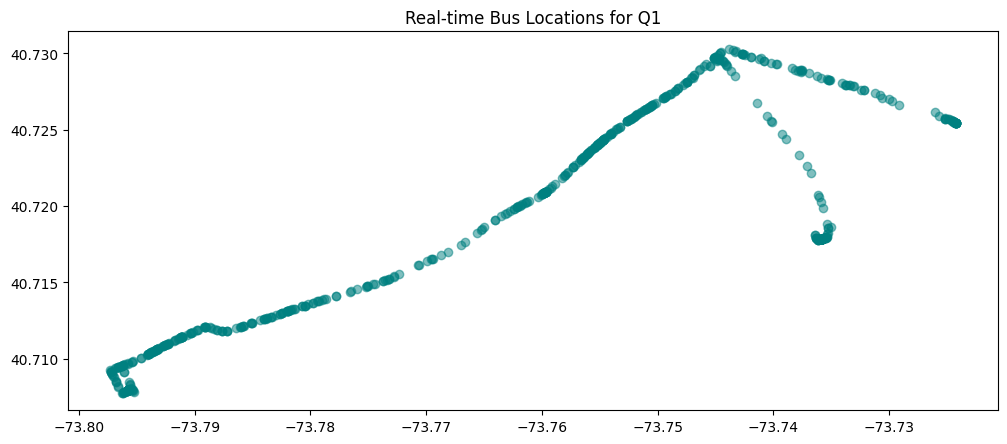

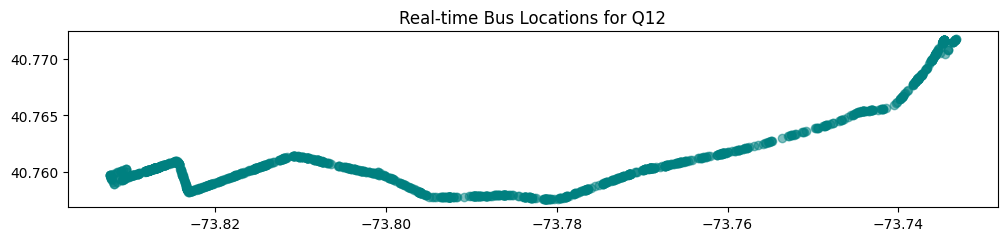

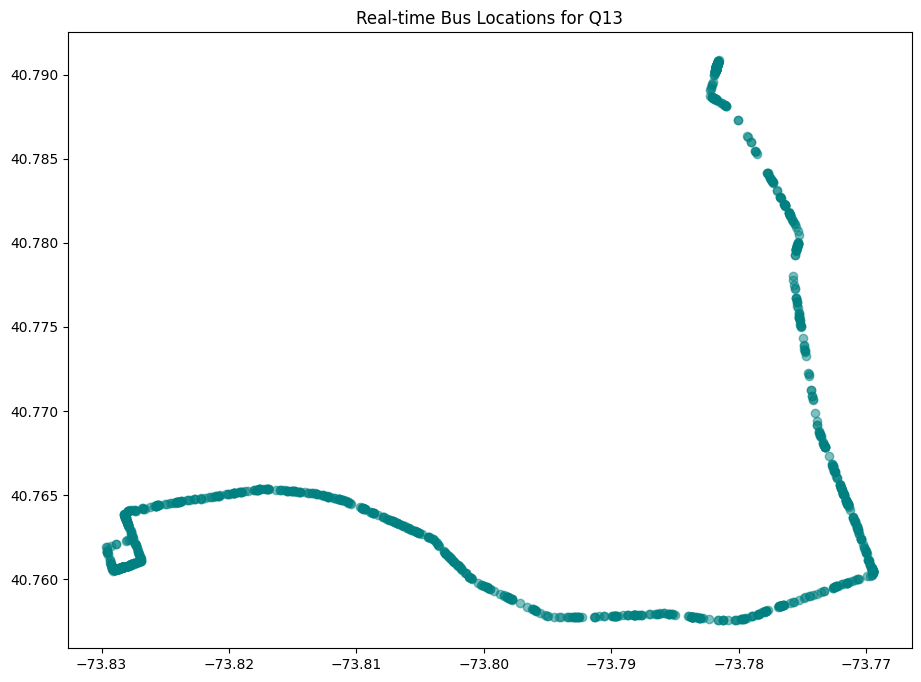

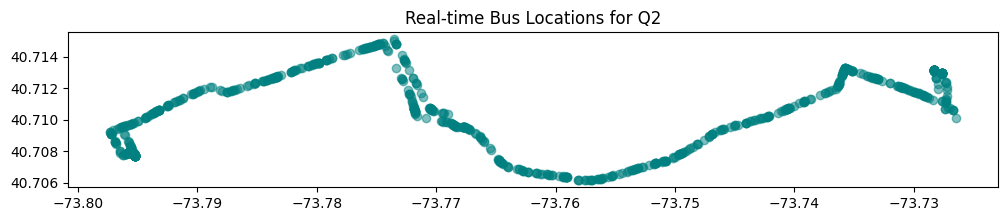

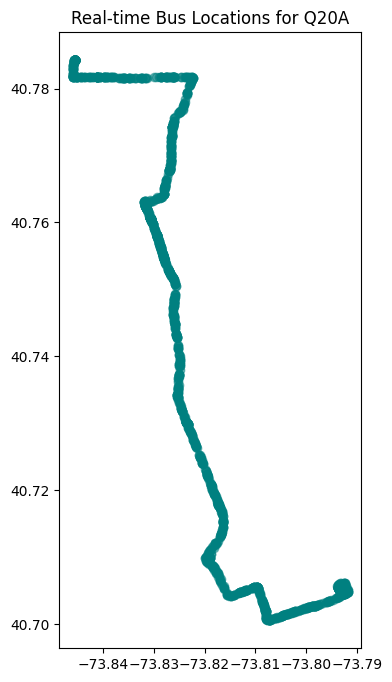

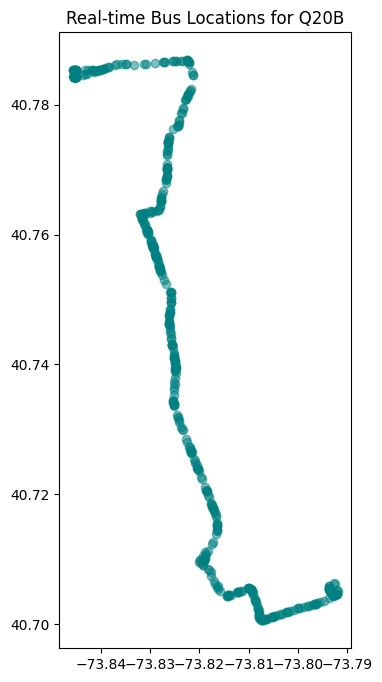

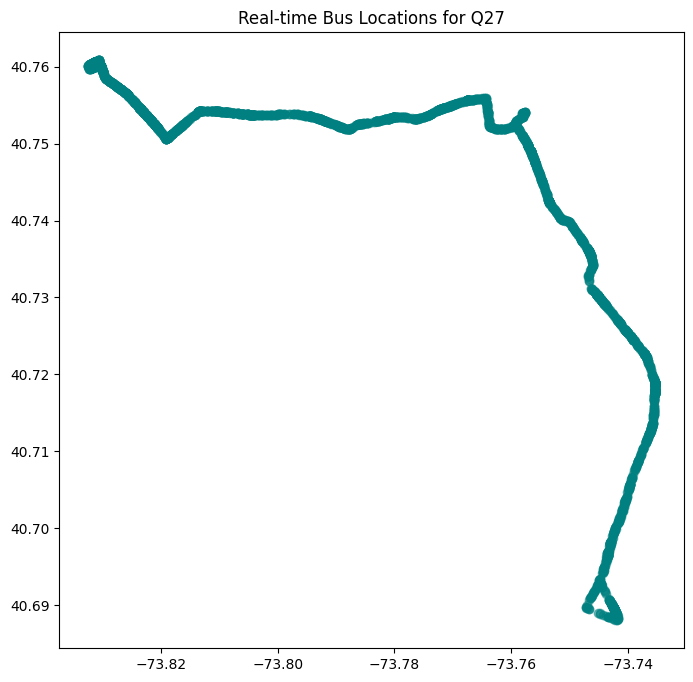

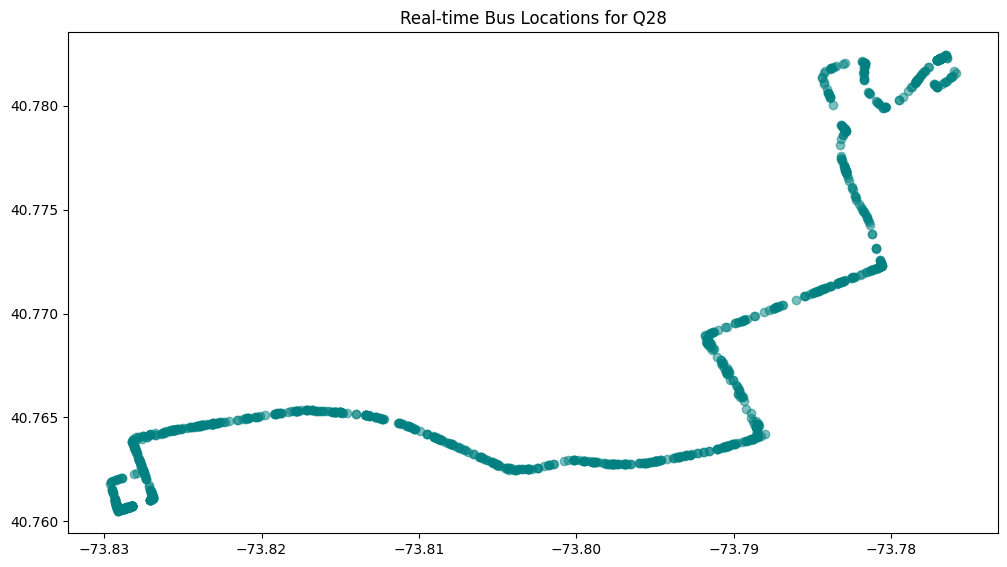

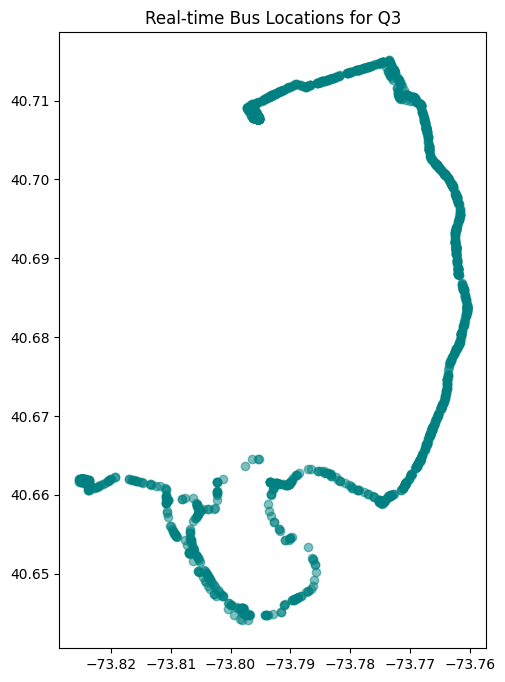

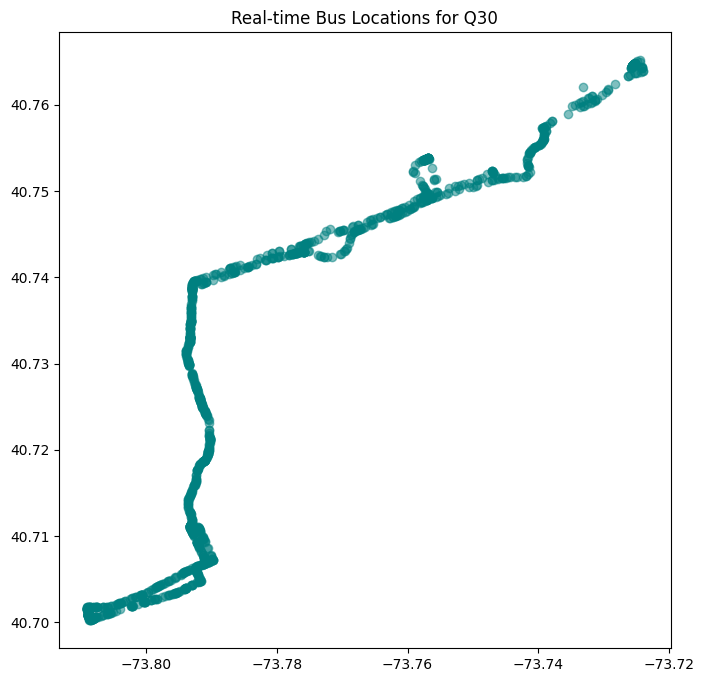

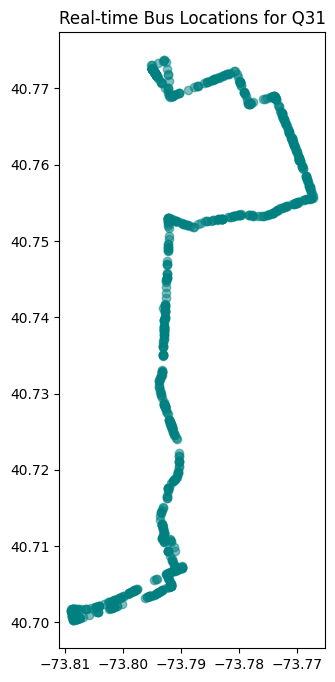

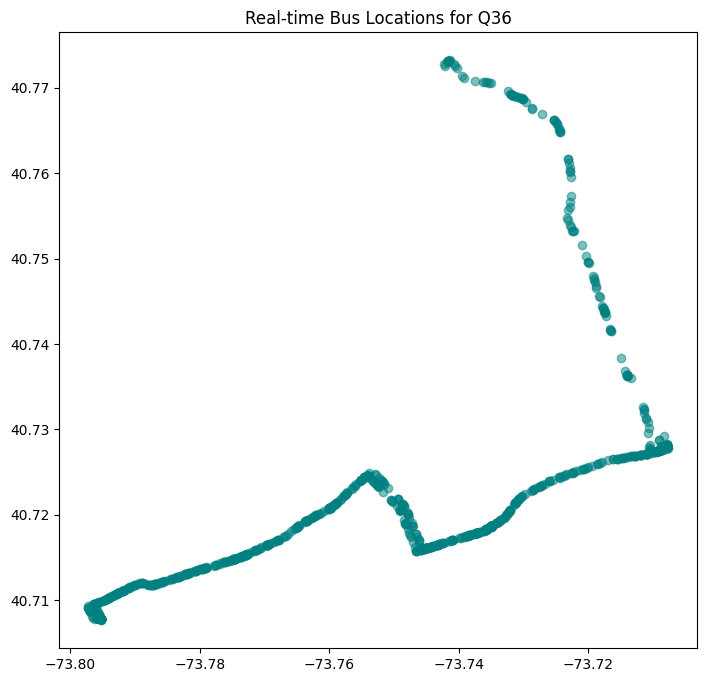

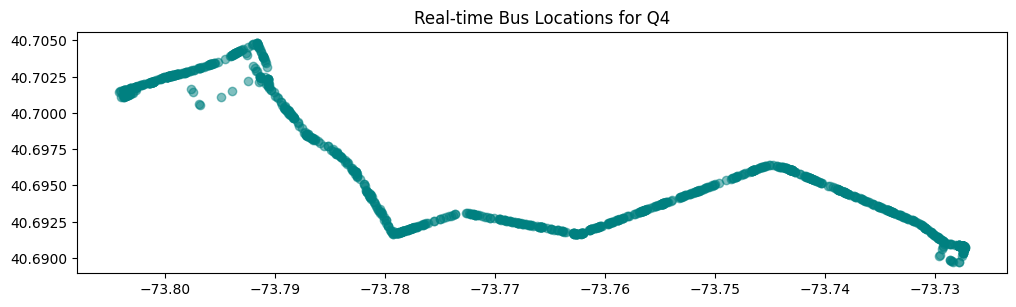

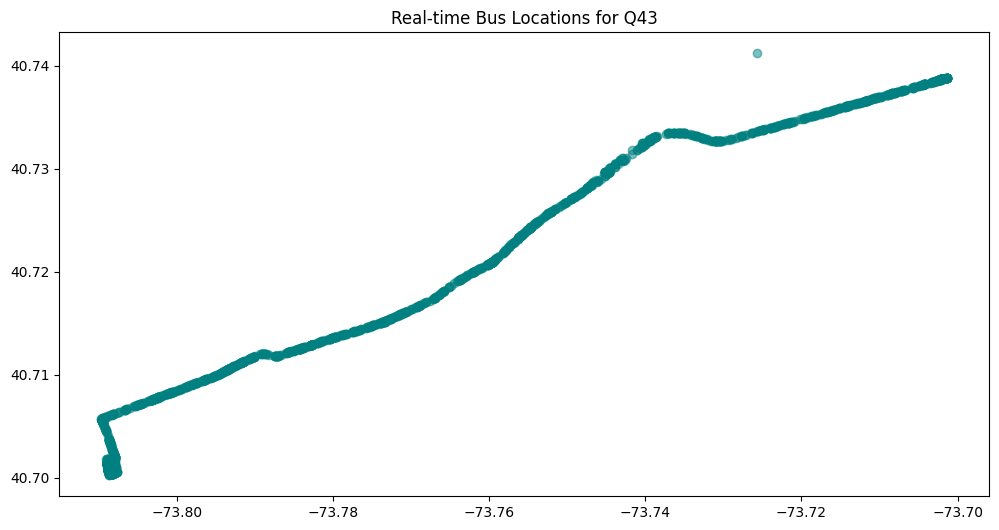

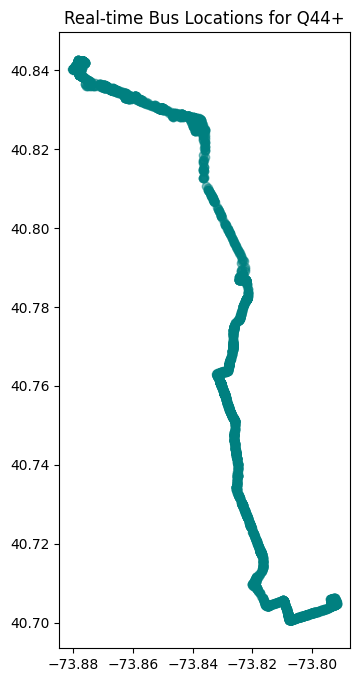

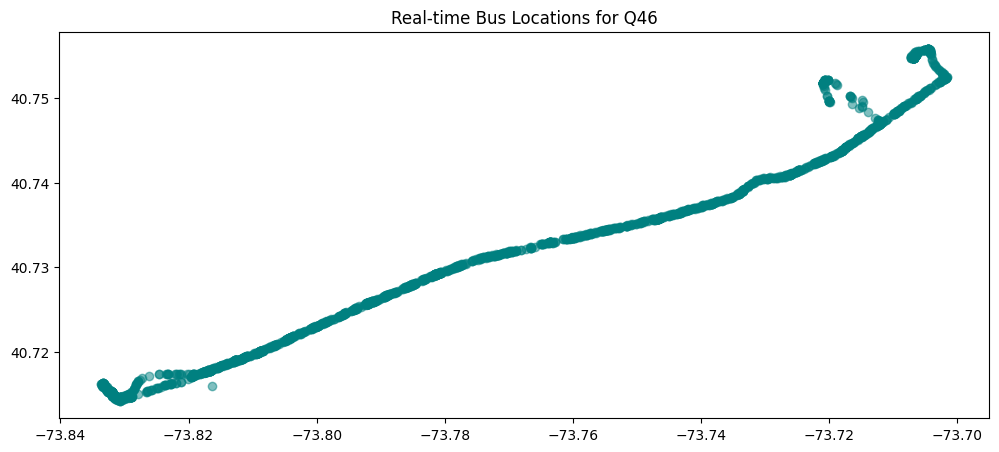

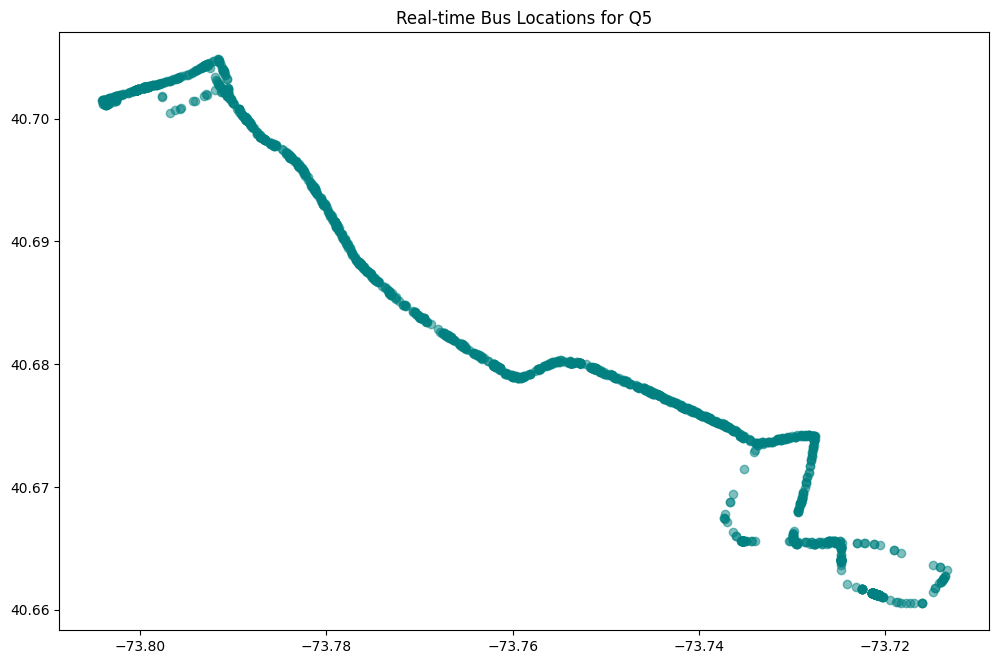

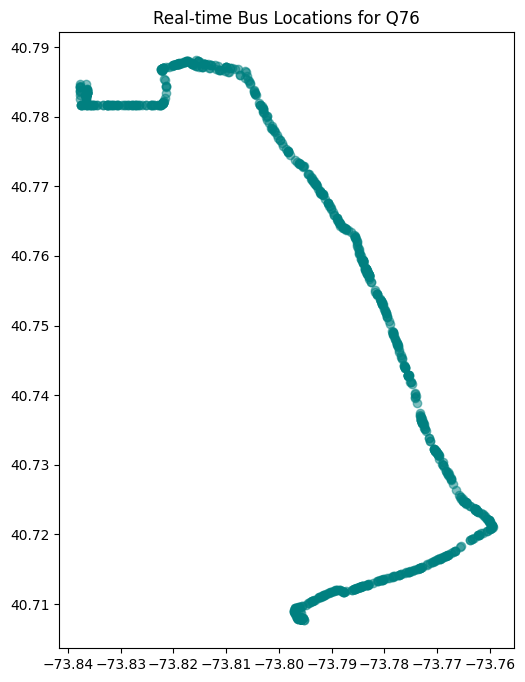

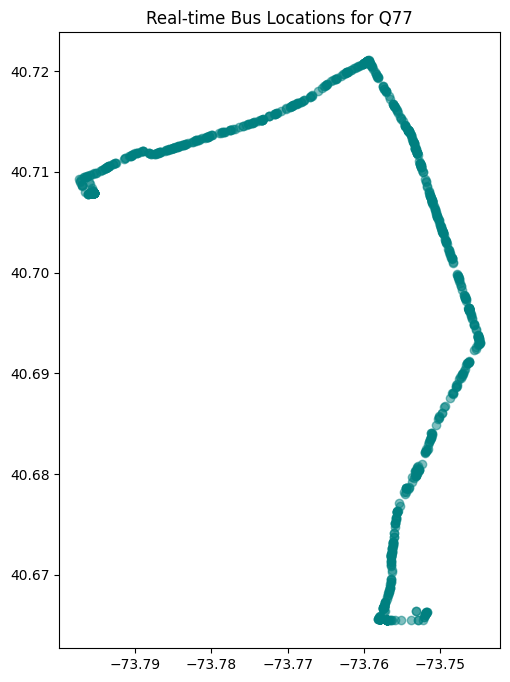

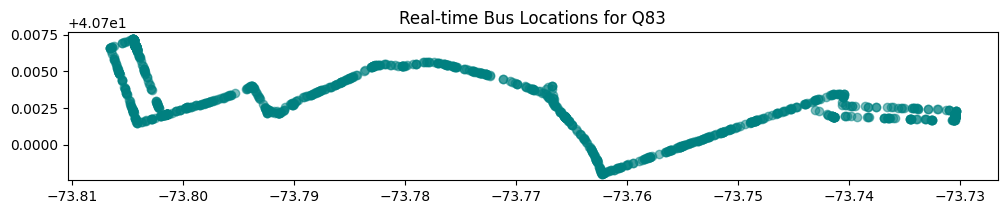

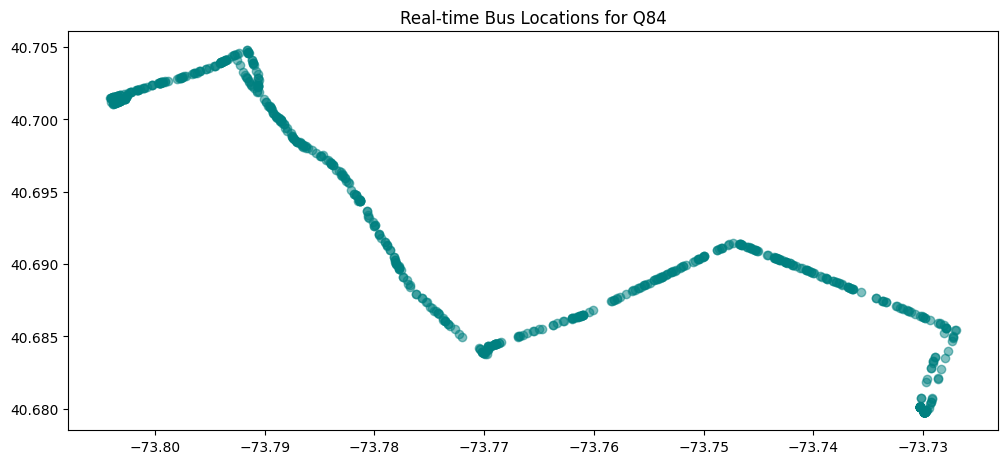

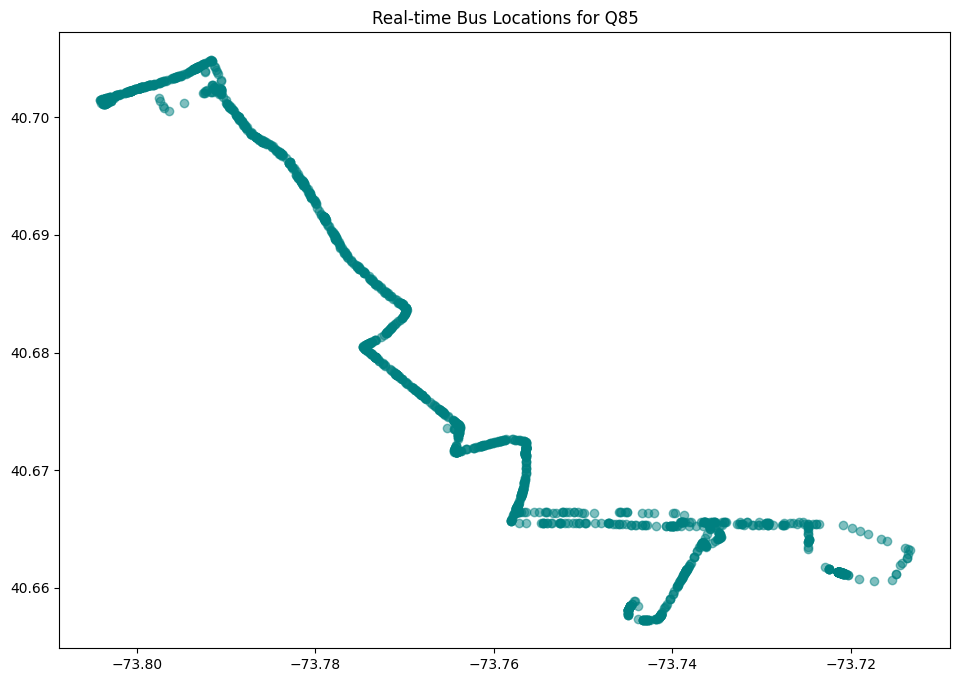

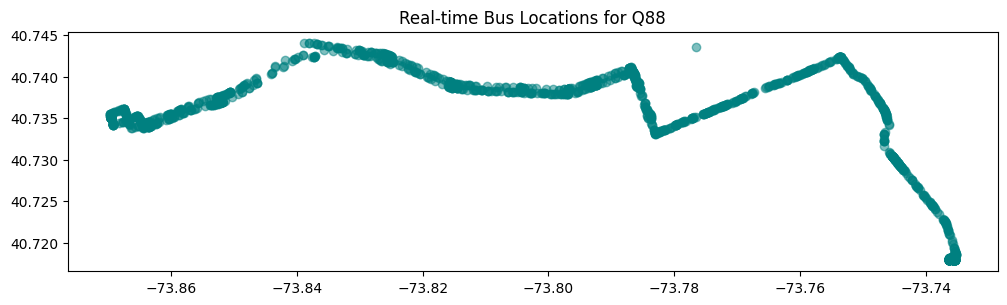

In [23]:
# Spatial Analysis
# Initialize a dictionary of GeoDataFrames
geo_dfs = {}
for route_id, df in real_time_dfs.items():
    # Add a geometry column
    df['geometry'] = df.apply(
        lambda row: Point(row['Longitude'], row['Latitude']), axis = 1
    )
    # Convert to a GeoDataFrame
    geo_dfs[route_id] = gpd.GeoDataFrame(df, geometry = 'geometry', crs = 'EPSG:4326')
    geo_dfs[route_id].plot(marker = 'o', color = 'teal', figsize = (12, 8), alpha = 0.5)
    plt.title(f'Real-time Bus Locations for {route_id}')
    plt.show()

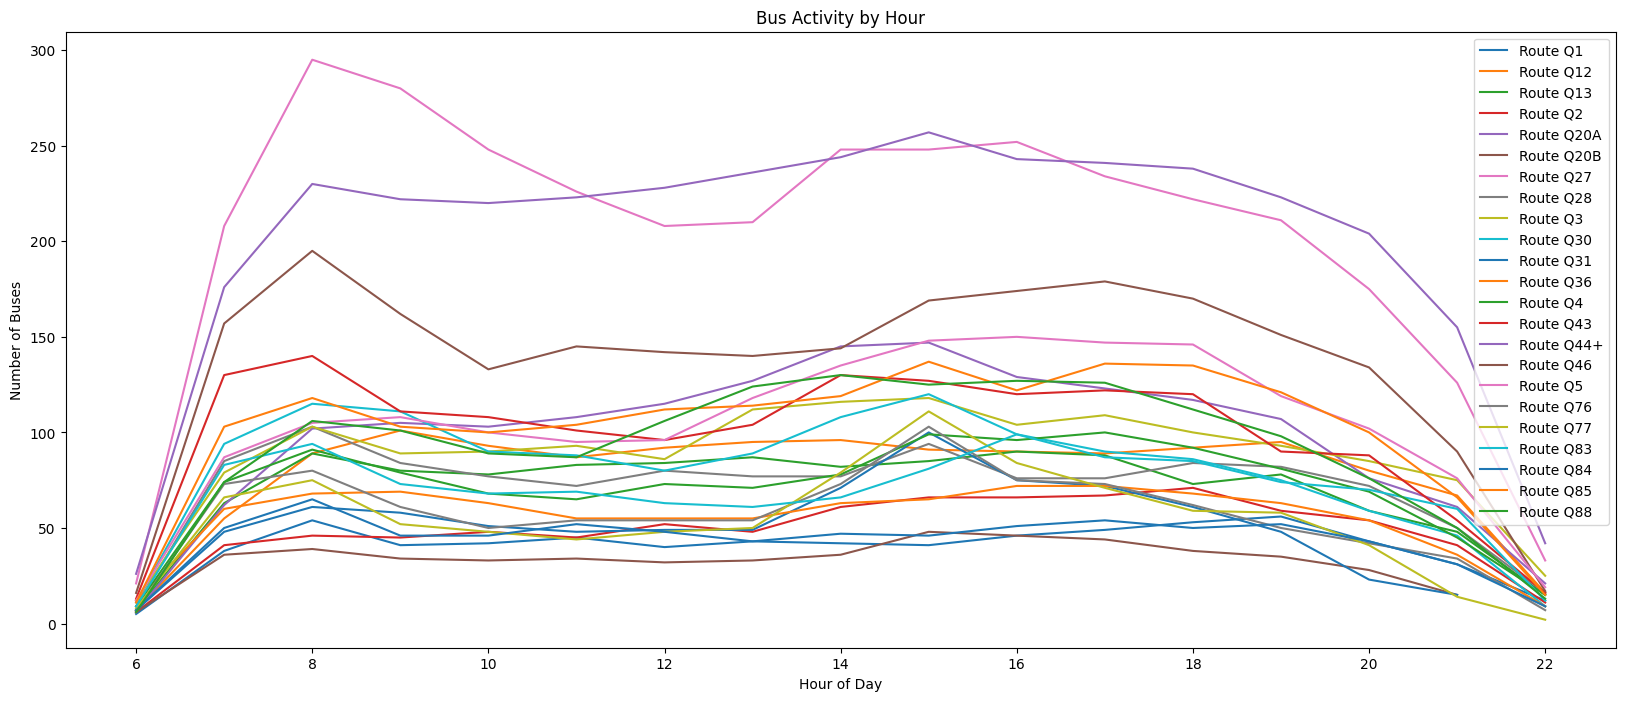

In [24]:
# Temporal Analysis

# Analyze trends for each route
plt.figure(figsize = (20, 8))
for route_id, df in real_time_dfs.items():
    # Extract the hour from the timestamp
    df['Hour'] = df['Timestamp'].dt.hour
    # Group by hour to calculate bus counts
    hourly_activity = df.groupby('Hour').size().reset_index(name = 'Bus Count')
    # Plot trends
    plt.plot(hourly_activity['Hour'], hourly_activity['Bus Count'], label = f'Route {route_id}')

plt.set_cmap('viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Buses')
plt.title('Bus Activity by Hour')
plt.legend()
plt.show()

In [25]:
# Identify outliers for each route
for route_id, df in real_time_dfs.items():
    low_activity_hours = df.groupby('Hour').size().reset_index(name = 'Bus Count')
    low_activity_hours = low_activity_hours[low_activity_hours['Bus Count'] < 5]
    display(f'Low activity hours for Route {route_id}:', low_activity_hours)

'Low activity hours for Route Q1:'

,Hour,Bus Count


'Low activity hours for Route Q12:'

,Hour,Bus Count


'Low activity hours for Route Q13:'

,Hour,Bus Count


'Low activity hours for Route Q2:'

,Hour,Bus Count


'Low activity hours for Route Q20A:'

,Hour,Bus Count


'Low activity hours for Route Q20B:'

,Hour,Bus Count


'Low activity hours for Route Q27:'

,Hour,Bus Count


'Low activity hours for Route Q28:'

,Hour,Bus Count


'Low activity hours for Route Q3:'

,Hour,Bus Count


'Low activity hours for Route Q30:'

,Hour,Bus Count


'Low activity hours for Route Q31:'

,Hour,Bus Count


'Low activity hours for Route Q36:'

,Hour,Bus Count


'Low activity hours for Route Q4:'

,Hour,Bus Count


'Low activity hours for Route Q43:'

,Hour,Bus Count


'Low activity hours for Route Q44+:'

,Hour,Bus Count


'Low activity hours for Route Q46:'

,Hour,Bus Count


'Low activity hours for Route Q5:'

,Hour,Bus Count


'Low activity hours for Route Q76:'

,Hour,Bus Count


'Low activity hours for Route Q77:'

,Hour,Bus Count
16,22,2


'Low activity hours for Route Q83:'

,Hour,Bus Count


'Low activity hours for Route Q84:'

,Hour,Bus Count


'Low activity hours for Route Q85:'

,Hour,Bus Count


'Low activity hours for Route Q88:'

,Hour,Bus Count


In [26]:
# Overlay Real-Time Activity for All Routes
# Combine real-time data for all routes
combined_realtime_gdf = gpd.GeoDataFrame(
    pd.concat(geo_dfs.values(), ignore_index = True),
    crs = 'EPSG:4326'
)

# Spatial join: Aggregate bus activity by neighborhood
bus_activity = gpd.sjoin(
    combined_realtime_gdf,
    eastern_queens_neighborhoods,
    how = 'inner',
    predicate = 'within'
)
bus_activity_counts = bus_activity.groupby('ntaname').size().reset_index(name = 'Bus Activity Count')

# Spatial join: Aggregate stop density by neighborhood
stop_density = gpd.sjoin(
    stops_gdf,
    eastern_queens_neighborhoods,
    how = 'inner',
    predicate = 'within'
)
stop_density_counts = stop_density.groupby('ntaname').size().reset_index(name = 'Stop Count')

# Merge bus activity and stop density into queens_neighborhoods
eastern_queens_neighborhoods = eastern_queens_neighborhoods.merge(
    bus_activity_counts,
    on = 'ntaname',
    how = 'left'
)
eastern_queens_neighborhoods = eastern_queens_neighborhoods.merge(
    stop_density_counts,
    on = 'ntaname',
    how = 'left'
)
eastern_queens_neighborhoods = eastern_queens_neighborhoods.fillna(0)

# Calculate Activity-to-Stop Ratio
eastern_queens_neighborhoods['Activity-to-Stop Ratio'] = (
    eastern_queens_neighborhoods['Bus Activity Count'] / eastern_queens_neighborhoods['Stop Count']
)
eastern_queens_neighborhoods['Activity-to-Stop Ratio'] = eastern_queens_neighborhoods['Activity-to-Stop Ratio'].fillna(0)

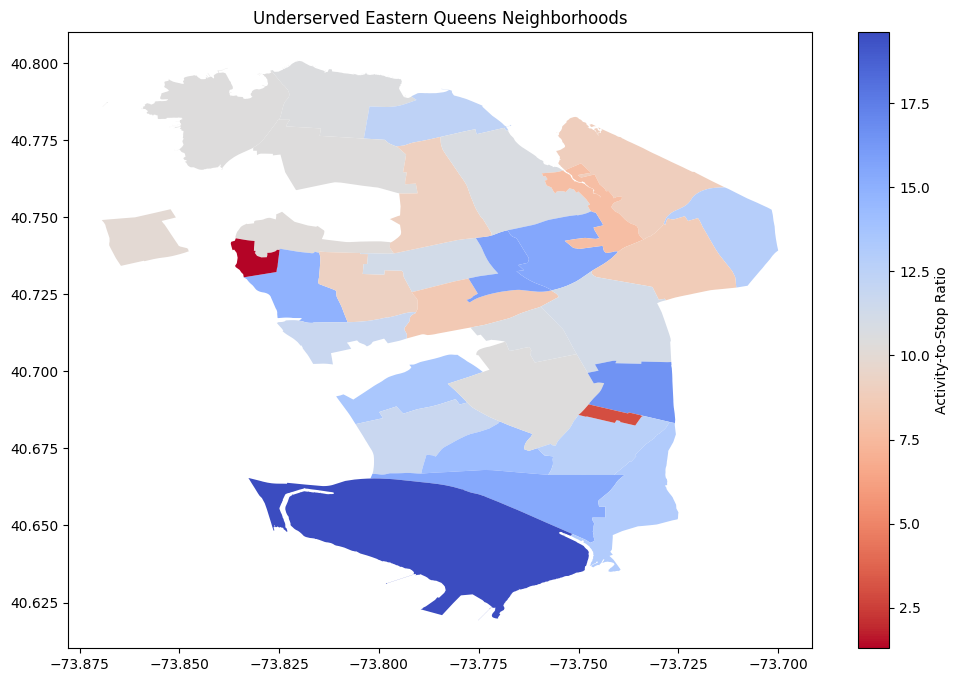

In [37]:
# Identify underseved neighborhoods
underserved = eastern_queens_neighborhoods[eastern_queens_neighborhoods['Activity-to-Stop Ratio'] < 20]

# Visualize underserved neighborhoods
underserved.plot(
    column = 'Activity-to-Stop Ratio',
    cmap = 'coolwarm_r',
    legend = True,
    figsize = (12, 8),
    legend_kwds = {'label': 'Activity-to-Stop Ratio'}
)
plt.gca().set_aspect("auto")
plt.title('Underserved Eastern Queens Neighborhoods')
plt.show()

In [38]:
# Summarize underserved neighborhoods
underserved_summary = underserved[['ntaname', 'Bus Activity Count', 'Stop Count', 'Activity-to-Stop Ratio']]

# Save as CSV
underserved_summary.to_csv('../data/underserved_neighborhoods_combined.csv')